## 1. Load data

In [1]:
import numpy as np
from helpers import load_csv_data

data_path = "./data/train.csv"
test_path = "./data/test.csv"
sample_path = "./data/sample-submission.csv"

In [2]:
labels, features, ids = load_csv_data(data_path, sub_sample=False)

print(np.isnan(features).sum())
print(features.shape, labels.shape, ids.shape)
print(features[0], labels[0], ids[0])

0
(250000, 30) (250000,) (250000,)
[ 1.38470e+02  5.16550e+01  9.78270e+01  2.79800e+01  9.10000e-01
  1.24711e+02  2.66600e+00  3.06400e+00  4.19280e+01  1.97760e+02
  1.58200e+00  1.39600e+00  2.00000e-01  3.26380e+01  1.01700e+00
  3.81000e-01  5.16260e+01  2.27300e+00 -2.41400e+00  1.68240e+01
 -2.77000e-01  2.58733e+02  2.00000e+00  6.74350e+01  2.15000e+00
  4.44000e-01  4.60620e+01  1.24000e+00 -2.47500e+00  1.13497e+02] 1.0 100000


## 2. Preprocess data

In [3]:
# split data
from helpers import train_test_split
from preprocessing import Preprocessor

prep = Preprocessor()
features_pp = prep.process_train(features, mapping=True, poly_degree=7)
features_tr, features_te, labels_tr, labels_te = train_test_split(labels, features_pp, 0.8, seed=432)

print(np.isnan(features).sum())
print(features_tr.shape, labels_tr.shape)
print(features_te.shape, labels_te.shape)

0
(200000, 145) (200000,)
(50000, 145) (50000,)


## 3. Train model with all features

### 3.1 MSE GD

In [4]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from implementations import mean_squared_error_gd

x_tr, x_te, y_tr, y_te = train_test_split(labels_tr, features_tr, ratio=0.8, seed=42)

max_iter = 1000
# gammas = [1e-1, 3e-2, 1e-2, 3e-3, 1e-3]
gammas = np.logspace(-2, -1, 6)
mse = np.zeros((len(gammas), 2))

initial_w = np.zeros((x_tr.shape[1]))


for i, gamma in enumerate(gammas):

    w, l_tr = mean_squared_error_gd(y_tr, x_tr, initial_w, max_iter, gamma)
    l_te = compute_loss(y_te, x_te, w)

    mse[i,:] = [l_tr, l_te]
    acc_tr = accuracy_score(y_tr, make_prediction(x_tr @ w))
    acc_te = accuracy_score(y_te, make_prediction(x_te @ w))

    print(f"gamma: {gamma:10g} \ttrain: [loss={l_tr:.5f}, acc={acc_te:.4f}]\
        \ttest: [loss={l_te:.5f}, accuracy={acc_te:.4f}]")


gamma:       0.01 	train: [loss=0.41292, acc=0.6737]        	test: [loss=0.41260, accuracy=0.6737]
gamma:  0.0158489 	train: [loss=0.40752, acc=0.6783]        	test: [loss=0.40725, accuracy=0.6783]
gamma:  0.0251189 	train: [loss=0.40230, acc=0.6843]        	test: [loss=0.40206, accuracy=0.6843]
gamma:  0.0398107 	train: [loss=0.39682, acc=0.6895]        	test: [loss=0.39658, accuracy=0.6895]
gamma:  0.0630957 	train: [loss=0.39106, acc=0.6969]        	test: [loss=0.39080, accuracy=0.6969]
gamma:        0.1 	train: [loss=0.38499, acc=0.7025]        	test: [loss=0.38468, accuracy=0.7025]


In [4]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from implementations import mean_squared_error_gd

x_tr, x_te, y_tr, y_te = train_test_split(labels_tr, features_tr, ratio=0.8, seed=42)

max_iter = 1000
# gammas = [1e-1, 3e-2, 1e-2, 3e-3, 1e-3]
gammas = np.logspace(-2, -1, 6)
mse = np.zeros((len(gammas), 2))

initial_w = np.zeros((x_tr.shape[1]))


for i, gamma in enumerate(gammas):

    w, l_tr = mean_squared_error_gd(y_tr, x_tr, initial_w, max_iter, gamma)
    l_te = compute_loss(y_te, x_te, w)

    mse[i,:] = [l_tr, l_te]
    acc_tr = accuracy_score(y_tr, make_prediction(x_tr @ w))
    acc_te = accuracy_score(y_te, make_prediction(x_te @ w))

    print(f"gamma: {gamma:10g} \ttrain: [loss={l_tr:.5f}, acc={acc_te:.4f}]\
        \ttest: [loss={l_te:.5f}, accuracy={acc_te:.4f}]")


gamma:       0.01 	train: [loss=0.38674, acc=0.6951]        	test: [loss=0.38675, accuracy=0.6951]
gamma:  0.0158489 	train: [loss=0.37665, acc=0.7030]        	test: [loss=0.37681, accuracy=0.7030]
gamma:  0.0251189 	train: [loss=0.36787, acc=0.7089]        	test: [loss=0.36817, accuracy=0.7089]
gamma:  0.0398107 	train: [loss=0.36118, acc=0.7158]        	test: [loss=0.36162, accuracy=0.7158]
gamma:  0.0630957 	train: [loss=0.35697, acc=0.7215]        	test: [loss=0.35753, accuracy=0.7215]
gamma:        0.1 	train: [loss=0.35451, acc=0.7246]        	test: [loss=0.35520, accuracy=0.7246]


In [18]:
# Compute accuracy on test set

gamma = 0.1
max_iter = 1000
initial_w = np.zeros((features_tr.shape[1]))
w, l_tr = mean_squared_error_gd(labels_tr, features_tr, initial_w, max_iter, gamma)

acc_tr = accuracy_score(labels_tr, make_prediction(features_tr @ w))
acc_te = accuracy_score(labels_te, make_prediction(features_te @ w))

print(f"train acc={acc_tr:.5f}, test acc={acc_te:.5f}")

train acc=0.73564, test acc=0.73530


gamma:        0.1 	train: [acc=0.7694]        	test: [accuracy=0.7675]
gamma:       0.03 	train: [acc=0.7586]        	test: [accuracy=0.7572]


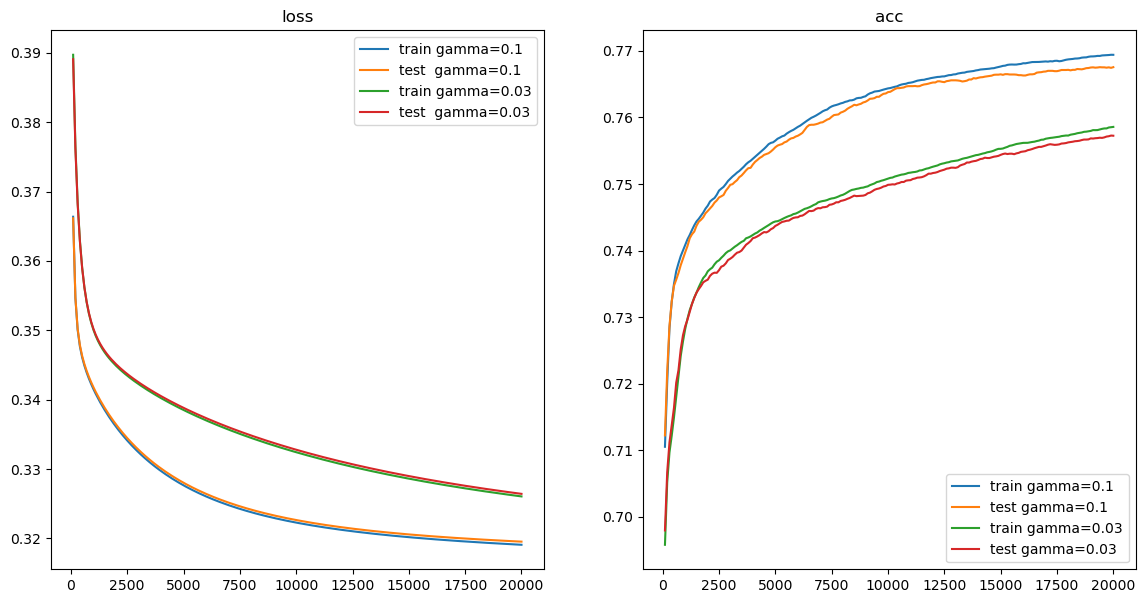

In [9]:
#### test convergence 

import matplotlib.pyplot as plt
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from implementations import mean_squared_error_gd

x_tr, x_te, y_tr, y_te = train_test_split(labels_tr, features_tr, ratio=0.8, seed=42)

max_iter = 20000
gammas = [1e-1, 3e-2]
# gammas = np.logspace(-2, -1, 3)
mse = np.zeros((len(gammas), 2))

initial_w = np.zeros((x_tr.shape[1]))

fig, ax = plt.subplots(1,2, figsize=(14,7))
for i, gamma in enumerate(gammas):

    test_per = 100
    acc_tr = []
    acc_te = []
    l_tr = []
    l_te = []
    w = np.array(initial_w)
    iters = list(range(test_per, max_iter+test_per, test_per))
    for _ in iters:
        w, _ = mean_squared_error_gd(y_tr, x_tr, w, test_per, gamma)
        acc_tr.append(accuracy_score(y_tr, make_prediction(x_tr @ w)))
        acc_te.append(accuracy_score(y_te, make_prediction(x_te @ w)))
        l_tr.append(compute_loss(y_tr, x_tr, w))
        l_te.append(compute_loss(y_te, x_te, w))
        
    ax[0].plot(iters, l_tr, label=f"train gamma={gamma}")
    ax[0].plot(iters, l_te, label=f"test  gamma={gamma}")
    ax[1].plot(iters, acc_tr, label=f"train gamma={gamma}")
    ax[1].plot(iters, acc_te, label=f"test gamma={gamma}")
    # acc_tr = accuracy_score(y_tr, make_prediction(x_tr @ w))
    # acc_te = accuracy_score(y_te, make_prediction(x_te @ w))

    print(f"gamma: {gamma:10g} \ttrain: [acc={acc_tr[-1]:.4f}]\
        \ttest: [accuracy={acc_te[-1]:.4f}]")

ax[0].set_title("loss")
ax[0].legend()
ax[1].set_title("acc")
ax[1].legend()
plt.show()

### 3.2 MSE SGD

In [21]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from implementations import mean_squared_error_sgd

x_tr, x_te, y_tr, y_te = train_test_split(labels_tr, features_tr, ratio=0.8, seed=42)

max_iter = 5
gammas = [1e-2, 3e-3, 1e-3, 3e-4]
# gammas = np.logspace(-0.8,-2, 5)
mse = np.zeros((len(gammas), 2))

initial_w = np.zeros((x_tr.shape[1]))


for i, gamma in enumerate(gammas):

    w, l_tr = mean_squared_error_sgd(y_tr, x_tr, initial_w, max_iter, gamma)
    l_te = compute_loss(y_te, x_te, w)

    mse[i,:] = [l_tr, l_te]
    acc_tr = accuracy_score(y_tr, make_prediction(x_tr @ w))
    acc_te = accuracy_score(y_te, make_prediction(x_te @ w))

    print(f"gamma: {gamma:.4f} \ttrain: [loss={mse[i,0]:.5f}, acc={acc_te:.4f}]\
        \ttest: [loss={mse[i,1]:.5f}, accuracy={acc_te:.4f}]")


gamma: 0.0100 	train: [loss=0.33259, acc=0.7587]        	test: [loss=0.33290, accuracy=0.7587]
gamma: 0.0030 	train: [loss=0.32993, acc=0.7599]        	test: [loss=0.33032, accuracy=0.7599]
gamma: 0.0010 	train: [loss=0.33164, acc=0.7538]        	test: [loss=0.33207, accuracy=0.7538]
gamma: 0.0003 	train: [loss=0.33935, acc=0.7427]        	test: [loss=0.33992, accuracy=0.7427]


In [23]:
# Compute accuracy on test set

gamma = 3e-3
max_iter = 10
initial_w = np.zeros((features_tr.shape[1]))
w, l_tr = mean_squared_error_sgd(labels_tr, features_tr, initial_w, max_iter, gamma)

acc_tr = accuracy_score(labels_tr, make_prediction(features_tr @ w))
acc_te = accuracy_score(labels_te, make_prediction(features_te @ w))

print(f"train acc={acc_tr:.5f}, test acc={acc_te:.5f}")

train acc=0.74936, test acc=0.75024


### 3.3 Least Squares with normal equation

In [24]:
from implementations import least_squares

# No hyperparameter to chosse

w, l_tr = least_squares(labels_tr, features_tr)
l_te = compute_loss(labels_te, features_te, w)
acc_tr = accuracy_score(labels_tr, make_prediction(features_tr @ w))
acc_te = accuracy_score(labels_te, make_prediction(features_te @ w))

print(f"train loss={l_tr:.5f}, test loss={l_te:.5f}")
print(f"train acc={acc_tr:.5f}, test acc={acc_te:.5f}")

train loss=0.31022, test loss=0.31490
train acc=0.78219, test acc=0.78170


### 3.4 Ridge Regression with normal equation

In [25]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from implementations import ridge_regression

x_tr, x_te, y_tr, y_te = train_test_split(labels_tr, features_tr, ratio=0.8, seed=42)

max_iter = 3
lambdas = np.logspace(-10, -1, 10)
mse = np.zeros((len(lambdas), 2))


for i, lambda_ in enumerate(lambdas):

    w, l_tr = ridge_regression(y_tr, x_tr, lambda_)
    l_te = compute_loss(y_te, x_te, w)

    mse[i,:] = [l_tr, l_te]
    acc_tr = accuracy_score(y_tr, make_prediction(x_tr @ w))
    acc_te = accuracy_score(y_te, make_prediction(x_te @ w))

    print(f"lambda_: {lambda_:15g} \ttrain: [loss={mse[i,0]:.5f}, acc={acc_te:.5f}]\
        \ttest: [loss={mse[i,1]:.5f}, accuracy={acc_te:.5f}]")
    

lambda_:           1e-10 	train: [loss=0.30999, acc=0.77860]        	test: [loss=0.31168, accuracy=0.77860]
lambda_:           1e-09 	train: [loss=0.31038, acc=0.77797]        	test: [loss=0.31260, accuracy=0.77797]
lambda_:           1e-08 	train: [loss=0.31146, acc=0.77677]        	test: [loss=0.31383, accuracy=0.77677]
lambda_:           1e-07 	train: [loss=0.31431, acc=0.77297]        	test: [loss=0.31667, accuracy=0.77297]
lambda_:           1e-06 	train: [loss=0.31931, acc=0.76810]        	test: [loss=0.32114, accuracy=0.76810]
lambda_:           1e-05 	train: [loss=0.32231, acc=0.76487]        	test: [loss=0.32353, accuracy=0.76487]
lambda_:          0.0001 	train: [loss=0.32614, acc=0.76095]        	test: [loss=0.32676, accuracy=0.76095]
lambda_:           0.001 	train: [loss=0.33601, acc=0.74570]        	test: [loss=0.33652, accuracy=0.74570]
lambda_:            0.01 	train: [loss=0.35363, acc=0.72090]        	test: [loss=0.35416, accuracy=0.72090]
lambda_:             0.1 	tr

In [26]:
from implementations import ridge_regression

lambda_ = 1e-10

w, l_tr = ridge_regression(labels_tr, features_tr, lambda_)
l_te = compute_loss(labels_te, features_te, w)
acc_tr = accuracy_score(labels_tr, make_prediction(features_tr @ w))
acc_te = accuracy_score(labels_te, make_prediction(features_te @ w))

print(f"train loss={l_tr:.5f}, test loss={l_te:.5f}")
print(f"train acc={acc_tr:.5f}, test acc={acc_te:.5f}")

train loss=0.31025, test loss=0.31470
train acc=0.78188, test acc=0.78130


### 3.5 Logistic Regression

In [30]:
from helpers import train_test_split, sigmoid, compute_loss_logistic, accuracy_score, make_prediction
from implementations import logistic_regression

# convert labels from {-1,1} to {0,1}
labels_tr01 = 0.5 + labels_tr / 2.
x_tr, x_te, y_tr, y_te = train_test_split(labels_tr01, features_tr, ratio=0.8, seed=42)

max_iter = 1000
gammas = np.logspace(-1, -2, 5)
# gammas = np.logspace(-0.8,-2, 5)
mse = np.zeros((len(gammas), 2))

initial_w = np.zeros((x_tr.shape[1]))


for i, gamma in enumerate(gammas):

    w, l_tr = logistic_regression(y_tr, x_tr, initial_w, max_iter       , gamma)
    l_te = compute_loss_logistic(y_te, x_te, w)

    mse[i,:] = [l_tr, l_te]
    acc_tr = accuracy_score(y_tr, make_prediction(sigmoid(x_tr @ w), logistic=True, zero_one=True))
    acc_te = accuracy_score(y_te, make_prediction(sigmoid(x_te @ w), logistic=True, zero_one=True))

    print(f"gamma: {gamma:.4f} \ttrain: [loss={l_tr:.5f}, acc={acc_te:.4f}]\
        \ttest: [loss={l_te:.5f}, accuracy={acc_te:.4f}]")


gamma: 0.1000 	train: [loss=0.53501, acc=0.7150]        	test: [loss=0.53574, accuracy=0.7150]
gamma: 0.0316 	train: [loss=0.56142, acc=0.7044]        	test: [loss=0.56150, accuracy=0.7044]
gamma: 0.0100 	train: [loss=0.58508, acc=0.6860]        	test: [loss=0.58471, accuracy=0.6860]
gamma: 0.0032 	train: [loss=0.61188, acc=0.6572]        	test: [loss=0.61154, accuracy=0.6572]
gamma: 0.0010 	train: [loss=0.63848, acc=0.6572]        	test: [loss=0.63830, accuracy=0.6572]


In [31]:
from helpers import train_test_split, sigmoid, compute_loss_logistic, accuracy_score, make_prediction
from implementations import logistic_regression

# convert labels from {-1,1} to {0,1}
labels_tr01 = 0.5 + labels_tr / 2.
labels_te01 = 0.5 + labels_te / 2.

max_iter = 2000
gamma = 0.1

initial_w = np.zeros((x_tr.shape[1]))

w, l_tr = logistic_regression(labels_tr, features_tr, initial_w, max_iter, gamma)
l_te = compute_loss_logistic(labels_te, features_te, w)

acc_tr = accuracy_score(labels_tr01, make_prediction(sigmoid(features_tr @ w), logistic=True, zero_one=True))
acc_te = accuracy_score(labels_te01, make_prediction(sigmoid(features_te @ w), logistic=True, zero_one=True))

w_lr = np.copy(w)
print(f"train acc={acc_tr:.5f}, test acc={acc_te:.5f}")

train acc=0.65716, test acc=0.65802


### 3.6 Regularized Logisic Regression

In [32]:
from helpers import train_test_split, sigmoid, compute_loss_logistic, accuracy_score, make_prediction
from implementations import reg_logistic_regression

# convert labels from {-1,1} to {0,1}
labels_tr01 = 0.5 + labels_tr / 2.
x_tr, x_te, y_tr, y_te = train_test_split(labels_tr01, features_tr, ratio=0.8, seed=42)

max_iter = 1000
lambda_ = 0.001
lambdas = np.logspace(-1,-4, 4)
gamma = 0.08
gammas = np.logspace(0, -1, 4)
# gammas = np.logspace(-0.8,-2, 5)

initial_w = np.zeros((x_tr.shape[1]))


for i, gamma in enumerate(gammas):
    for j, lambda_ in enumerate(lambdas):

        w, l_tr = reg_logistic_regression(y_tr, x_tr, lambda_, initial_w, max_iter, gamma)
        l_te = compute_loss_logistic(y_te, x_te, w)

        acc_tr = accuracy_score(y_tr, make_prediction(sigmoid(x_tr @ w), logistic=True, zero_one=True))
        acc_te = accuracy_score(y_te, make_prediction(sigmoid(x_te @ w), logistic=True, zero_one=True))

        print(f"gamma: {gamma:.4f}, lambda_: {lambda_:.4f}\
            \ttrain: [loss={l_tr:.5f}, acc={acc_te:.4f}]\
            \ttest: [loss={l_te:.5f}, accuracy={acc_te:.4f}]")


gamma: 1.0000, lambda_: 0.1000            	train: [loss=0.62910, acc=0.6590]            	test: [loss=0.60728, accuracy=0.6590]
gamma: 1.0000, lambda_: 0.0100            	train: [loss=0.57896, acc=0.7040]            	test: [loss=0.55728, accuracy=0.7040]
gamma: 1.0000, lambda_: 0.0010            	train: [loss=0.53422, acc=0.7298]            	test: [loss=0.52029, accuracy=0.7298]
gamma: 1.0000, lambda_: 0.0001            	train: [loss=0.51244, acc=0.7405]            	test: [loss=0.50991, accuracy=0.7405]
gamma: 0.4642, lambda_: 0.1000            	train: [loss=0.62910, acc=0.6590]            	test: [loss=0.60728, accuracy=0.6590]
gamma: 0.4642, lambda_: 0.0100            	train: [loss=0.57896, acc=0.7040]            	test: [loss=0.55728, accuracy=0.7040]
gamma: 0.4642, lambda_: 0.0010            	train: [loss=0.53474, acc=0.7277]            	test: [loss=0.52283, accuracy=0.7277]
gamma: 0.4642, lambda_: 0.0001            	train: [loss=0.51829, acc=0.7339]            	test: [loss=0.51713, a

In [33]:
from helpers import train_test_split, sigmoid, compute_loss_logistic, accuracy_score, make_prediction
from implementations import reg_logistic_regression

# convert labels from {-1,1} to {0,1}
labels_tr01 = 0.5 + labels_tr / 2.
labels_te01 = 0.5 + labels_te / 2.

max_iter = 1000
gamma = 0.5                             
lambda_ = 1e-4

initial_w = np.zeros((x_tr.shape[1]))

w, l_tr = reg_logistic_regression(labels_tr, features_tr, lambda_, initial_w, max_iter, gamma)
l_te = compute_loss_logistic(labels_te, features_te, w)

acc_tr = accuracy_score(labels_tr01, make_prediction(sigmoid(features_tr @ w), logistic=True, zero_one=True))
acc_te = accuracy_score(labels_te01, make_prediction(sigmoid(features_te @ w), logistic=True, zero_one=True))

w_rlr = np.copy(w)
print(f"train acc={acc_tr:.5f}, test acc={acc_te:.5f}")

train acc=0.65716, test acc=0.65802


## 4. Predict for Submission

train final model for prediction

In [5]:
# Load test data
_ , features_submit, ids_submit = load_csv_data(test_path, sub_sample=False)

In [6]:
from implementations import mean_squared_error_gd, least_squares, ridge_regression

w_ls, l_ls = least_squares(y_tr, x_tr,)
w_rr, l_rr = ridge_regression(y_tr, x_tr, lambda_=1e-4)
w_rlr, l_rlr = reg_logistic_regression(y_tr, x_tr, lambda_=1e-3)

# Make prediction
pred = None # TODO


# EXample with MSE GD
from implementations import mean_squared_error_gd
gamma = 3e-2
max_iter = 2000
initial_w = np.zeros((features.shape[1]))
w, l_tr = mean_squared_error_gd(labels, features, initial_w, max_iter, gamma)

from helpers import make_prediction
pred = make_prediction(features_submit @ w)

In [7]:
# Write to file 

from helpers import create_csv_submission

create_csv_submission(ids_submit, pred, sample_path)